# Plotting with Seaborn

Graph galleries: \
https://seaborn.pydata.org/examples/index.html \
https://www.python-graph-gallery.com/ \
https://plotly.com/python/

Getting started with Python/Anaconda and Jupyter notebook: \
https://docs.anaconda.com/anaconda/user-guide/getting-started/ \
https://docs.jupyter.org/en/latest/start/index.html

## Load packages and import data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import functions_seaborn_demo as func

In [4]:
group_stats = pd.read_excel('data/group_stats.xlsx')
group_stats.head()

,participant,movement_type,adaptation_modality,test_modality,adaptation_delay,thresholds,slopes,widths
0,1,Active,Visual,Visual,0 ms,312.887767,0.002394,548.263392
1,1,Active,Visual,Visual,150 ms,333.885424,0.002021,618.192115
2,1,Active,Auditory,Auditory,0 ms,432.666344,0.002092,627.397207
3,1,Active,Auditory,Auditory,150 ms,342.698149,0.002227,589.214339
4,1,Active,Visual,Auditory,0 ms,275.220563,0.005938,221.015043


## Plotting with categorical data

https://seaborn.pydata.org/generated/seaborn.catplot.html

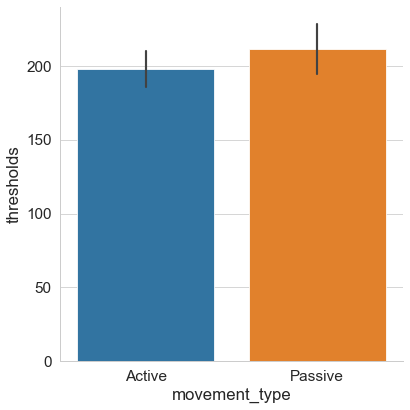

In [5]:
sns.set_style("whitegrid") # set the style of the plot (e.g., whitegrid, darkgrid, white, dark, ticks)

sns.set_context("paper", font_scale = 1.75) # set the context of the plot (e.g., paper, notebook, talk, poster)


plot = sns.catplot(data = group_stats,  # dataset that is used for plotting
                   x = 'movement_type', # categorical variable
                   y = 'thresholds',    # dependent variable
                   kind = 'bar',        # kind of plot; options: bar, violin, box, boxen, strip, swarm, point
                   height = 6,          # size of the plot
                   )

### Defining colors

https://seaborn.pydata.org/tutorial/color_palettes.html \
https://matplotlib.org/stable/gallery/color/named_colors.html

In [6]:
palette = sns.choose_colorbrewer_palette('diverging') # sequential, qualitative
# palette = sns.choose_light_palette()
# palette = sns.choose_dark_palette()
# palette = sns.choose_diverging_palette()

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

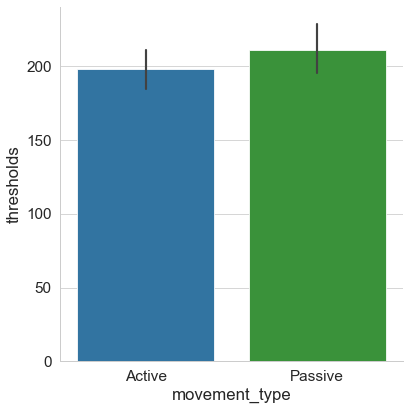

In [10]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75) 

plot = sns.catplot(data = group_stats,  
                   x = 'movement_type', 
                   y = 'thresholds',    
                   kind = 'bar',        
                   height = 6, 
                   palette = palette,
                   # palette = 'crest',   # using a predifined color palette
                   # palette = {'Active': 'tab:blue', 'Passive': 'tab:green'}, # defining colors manually
                  )

### Finetuning

https://matplotlib.org/stable/api/pyplot_summary.html

In [ ]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75) 

plot = sns.catplot(data = group_stats,  
                   x = 'movement_type', 
                   y = 'thresholds',    
                   kind = 'bar',        
                   height = 6,          
                   palette = 'crest',   
                   order = ['Passive', 'Active'], # defining the order of conditions
                   estimator = np.mean,           # defining the statistical funcion to plot (e.g., np.median, np.var)
                  )

# plt.ylabel('Threshold [ms]')  
# plt.xlabel('Movement type')
# plt.title('Active vs. Passive', fontsize = 20, weight = 'bold')
# plt.savefig('plots/catplot.png')
# plt.show() 

### Adding a second categorical variable

In [ ]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75) 

plot = sns.catplot(data = group_stats,  
                   x = 'movement_type', 
                   y = 'thresholds',    
                   hue = 'adaptation_delay', # additional categorical variable                   
                   kind = 'bar',  
                   height = 6,          
                   palette = 'crest',
                   
                   # hue_order = ['150 ms', '0 ms'],
                   # legend_out = False,                   
                  )   

plot._legend.set_title('Adaptation delay') 
plt.ylabel('Threshold [ms]')  
plt.xlabel('Movement type')   
plt.show()                    

### Adding a third categorical variable

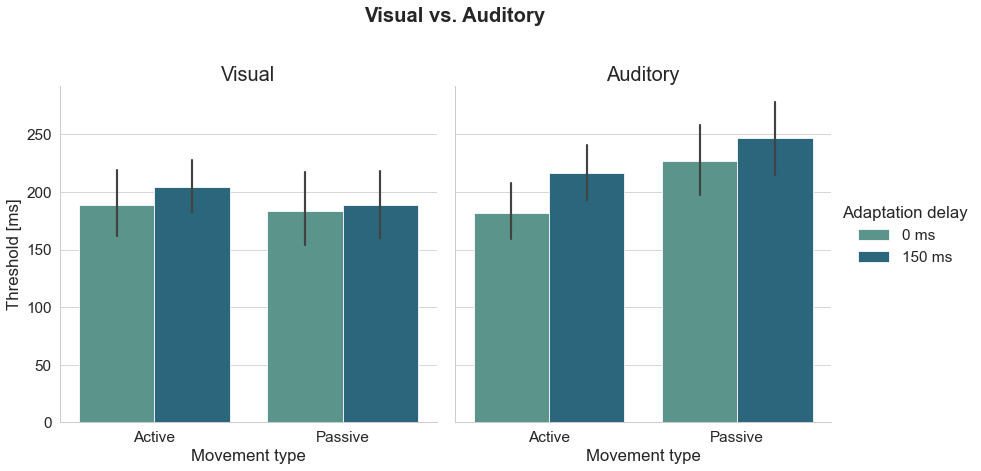

In [13]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.catplot(data = group_stats,  
                   x = 'movement_type', 
                   y = 'thresholds',    
                   hue = 'adaptation_delay',  
                   col = 'test_modality',    # third categorical variable
                   kind = 'bar',        
                   height = 6,          
                   palette = 'crest',

                   # sharey = False,         # plots an individual y axis for each column
                   # col_order = ['Auditory', 'Visual'],
                   )   
            
plot._legend.set_title('Adaptation delay') 
plot.axes.flat[0].set_ylabel('Threshold [ms]')
for axis in range(2): plot.axes.flat[axis].set_xlabel('Movement type') 

plot.set_titles("{col_name}", size = 20)
plt.suptitle('Visual vs. Auditory', x = 0.475, y = 1.1, weight = 'bold')

plt.show()                    

## Different plot types for categorical data & Subplot structure

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

### Categorical estimate plots

https://seaborn.pydata.org/generated/seaborn.barplot.html \
https://seaborn.pydata.org/generated/seaborn.pointplot.html

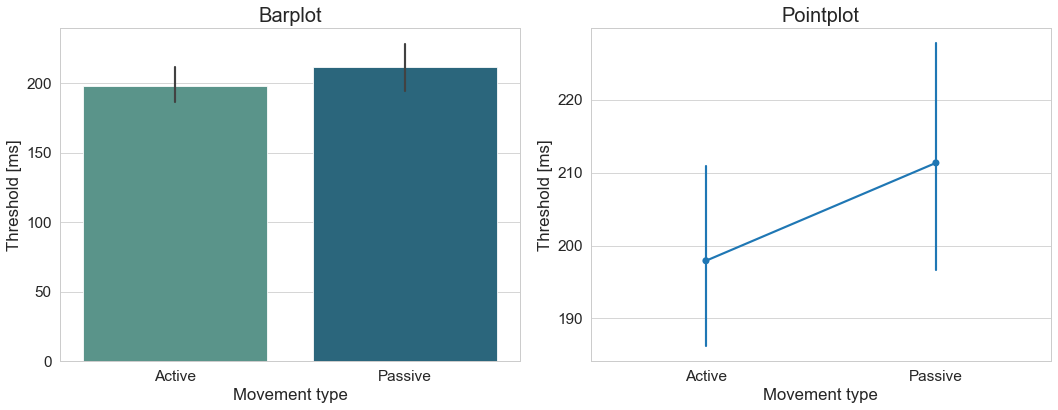

In [14]:
# Definition of figure properties
#    - fig: overall figure
#    - axes: individual plots within the figure

fig, axes = plt.subplots(1,                 # number of rows
                         2,                 # number of columns (e.g., 2 plots next to each other)
                         figsize = (15, 6), # size of the figure (x/y)
                         sharey = False)

# First plot
sns.barplot(ax = axes[0],  # define position of the plot within the figure
            data = group_stats, 
            x = 'movement_type', 
            y = 'thresholds', 
            palette = 'crest')
axes[0].set_title('Barplot', fontsize = 20)


# Second plot
sns.pointplot(ax = axes[1], # define position of the plot within the figure
              data = group_stats, 
              x = 'movement_type', 
              y = 'thresholds')
axes[1].set_title('Pointplot', fontsize = 20)


for axis in range(2): axes[axis].set_xlabel('Movement type')
for axis in range(2): axes[axis].set_ylabel('Threshold [ms]') 
plt.tight_layout() # makes sure individual subplots are not overlapping
plt.show()  

### Categorical distribution plots

https://seaborn.pydata.org/generated/seaborn.boxplot.html \
https://seaborn.pydata.org/generated/seaborn.boxenplot.html \
https://seaborn.pydata.org/generated/seaborn.violinplot.html

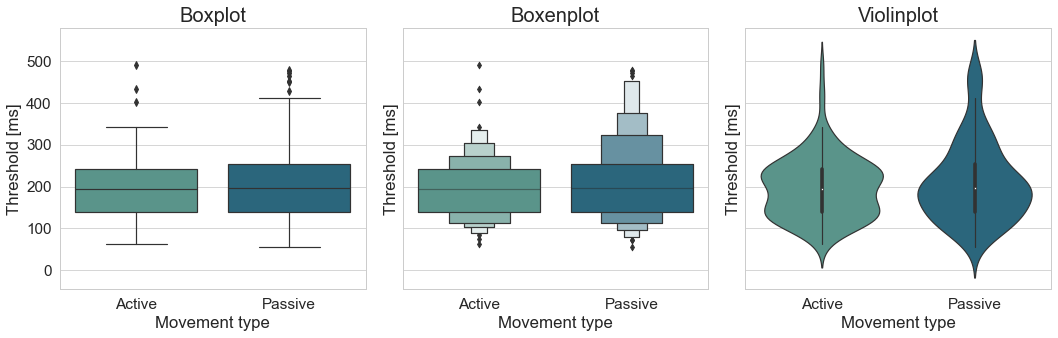

In [15]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5), sharey = True)

# First plot
sns.boxplot(ax = axes[0], data = group_stats, x = 'movement_type', y = 'thresholds', palette = 'crest')
axes[0].set_title('Boxplot', fontsize = 20)

# Second plot
sns.boxenplot(ax = axes[1], data = group_stats, x = 'movement_type', y = 'thresholds', palette = 'crest')
axes[1].set_title('Boxenplot', fontsize = 20)

# Third plot
sns.violinplot(ax = axes[2], data = group_stats, x = 'movement_type', y = 'thresholds', palette = 'crest')
axes[2].set_title('Violinplot', fontsize = 20)

for axis in range(3): axes[axis].set_xlabel('Movement type')
for axis in range(3): axes[axis].set_ylabel('Threshold [ms]')
plt.tight_layout()
plt.show()  

### Categorical scatterplots

https://seaborn.pydata.org/generated/seaborn.stripplot.html \
https://seaborn.pydata.org/generated/seaborn.swarmplot.html

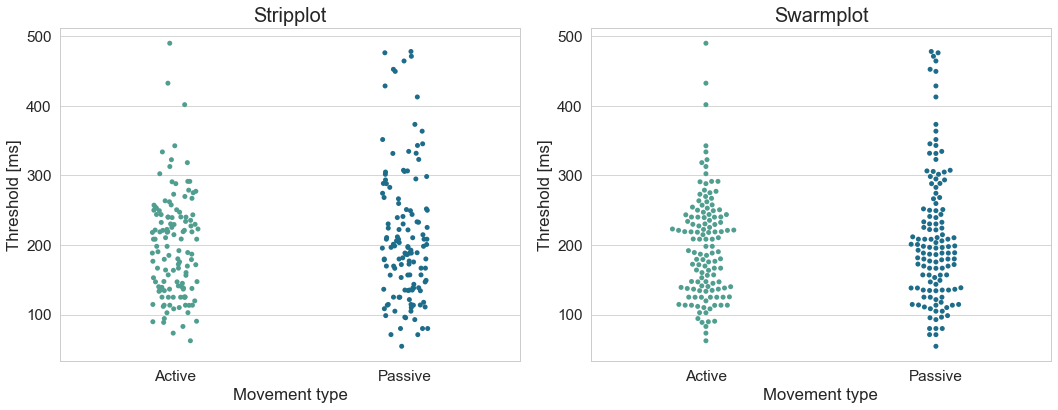

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6), sharey = False)

sns.stripplot(ax = axes[0], data = group_stats, x = 'movement_type', y = 'thresholds', palette = 'crest')
axes[0].set_title('Stripplot', fontsize = 20)

sns.swarmplot(ax = axes[1], data = group_stats, x = 'movement_type', y = 'thresholds', palette = 'crest')
axes[1].set_title('Swarmplot', fontsize = 20)

for axis in range(2): axes[axis].set_xlabel('Movement type')
for axis in range(2): axes[axis].set_ylabel('Threshold [ms]')
plt.tight_layout()
plt.show()              


### Combining plots

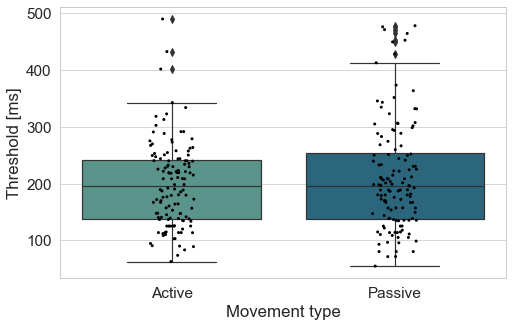

In [17]:
plt.figure(figsize = (8,5))

# First plot
sns.boxplot(data = group_stats, 
            x = 'movement_type', 
            y = 'thresholds', 
            palette = 'crest')

# Second plot
sns.stripplot(data = group_stats, 
              x = 'movement_type', 
              y = 'thresholds',
              color = 'black',
              size = 3)

plt.ylabel('Threshold [ms]')  
plt.xlabel('Movement type')

plt.show()  

## Visualizing distributions of data

In [19]:
trial_data = pd.read_excel('data/single_trial_data.xlsx')
data_to_plot = trial_data[trial_data['movement_type'] == 'Active']
data_to_plot.head()

,adaptation_modality,participant,run,trial,movement_type,test_modality,adaptation_delay,test_delay,responses,movement_durations,movement_latencies
22,Auditory,1,1,25,Active,Visual,0 ms,167,0,342.49,1073
23,Auditory,1,1,26,Active,Visual,0 ms,250,0,382.20,984
24,Auditory,1,1,30,Active,Visual,0 ms,0,0,355.98,1211
25,Auditory,1,1,32,Active,Visual,0 ms,417,0,336.55,889
26,Auditory,1,1,35,Active,Visual,0 ms,250,0,324.66,179


### Histogram

https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

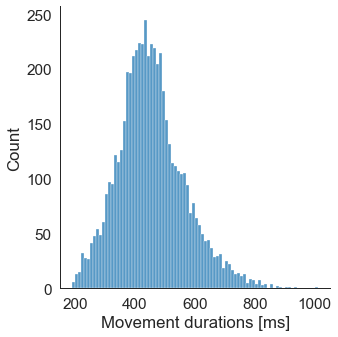

In [20]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.displot(data = data_to_plot, 
                   x = "movement_durations", 
                   binwidth = 10)

plt.xlabel('Movement durations [ms]')
plt.show()

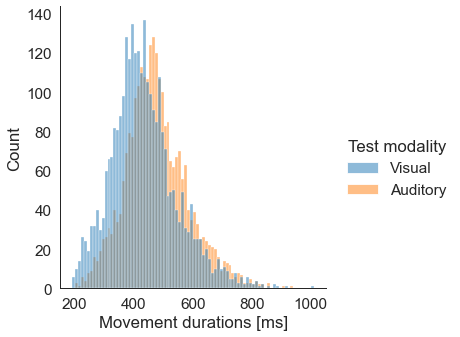

In [21]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.displot(data = data_to_plot, 
                   x = "movement_durations",
                   hue = 'test_modality',  
                   binwidth = 10)

plot._legend.set_title('Test modality') 
plt.xlabel('Movement durations [ms]')
plt.show()

### Kernel density estimate (KDE) plot

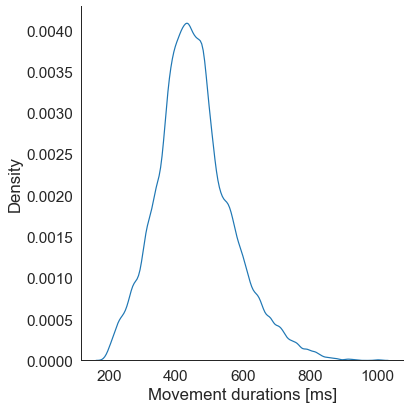

In [22]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.displot(data = data_to_plot, 
                   x = "movement_durations", 
                   kind = 'kde', 
                   height = 6,
                   bw_adjust = 0.5) # the higher the smoother the curve

plt.xlabel('Movement durations [ms]')
plt.show()

## Visualizing statistical relationships

### Scatter plot

https://seaborn.pydata.org/generated/seaborn.relplot.html

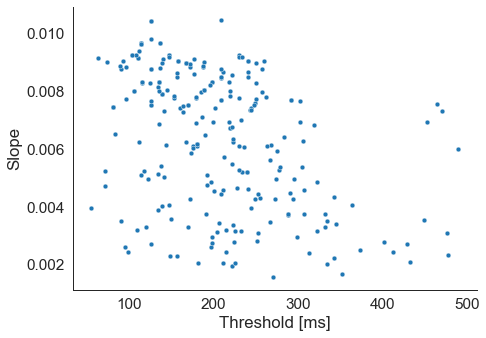

In [23]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.relplot(data = group_stats,
                   x = 'thresholds', 
                   y = 'slopes', 
                   kind = 'scatter');

plot.figure.set_size_inches(8, 5)
plt.xlabel('Threshold [ms]') 
plt.ylabel('Slope')
plt.show()

### Scatterplot with linear regression model fit

https://seaborn.pydata.org/generated/seaborn.regplot.html

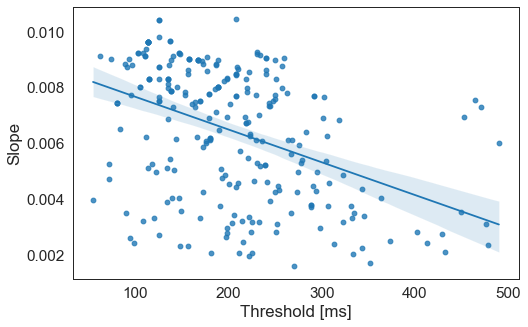

In [24]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.regplot(data = group_stats,
                   x = "thresholds", 
                   y = "slopes", 
                  # marker = '*',
                  )

plot.figure.set_size_inches(8, 5)
plt.xlabel('Threshold [ms]')
plt.ylabel('Slope')
plt.show()

### Jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html

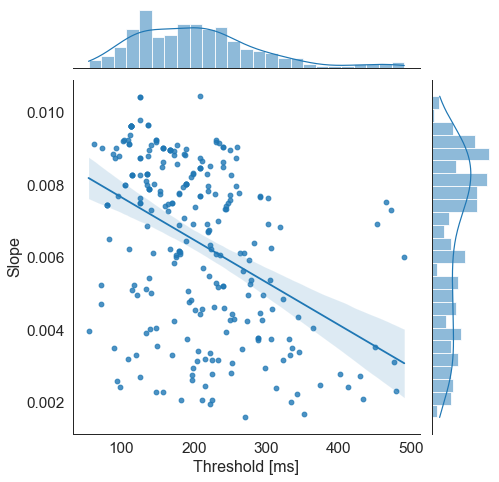

In [25]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.jointplot(data = group_stats,
                     x = "thresholds", 
                     y = "slopes",
                     kind = "reg", 
                     height = 7,
                     marginal_kws = dict(bins = 25, fill = True))

plot.set_axis_labels('Threshold [ms]', 'Slope', fontsize=16)
plt.show()

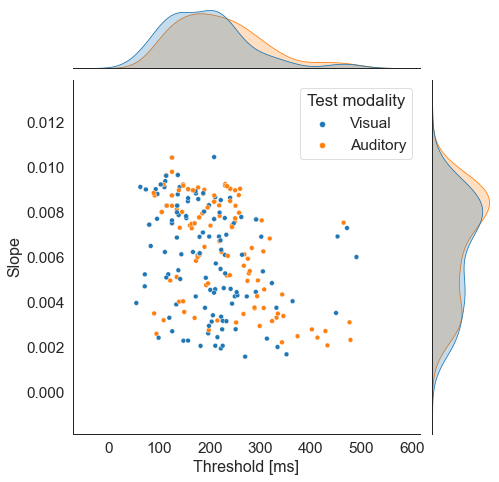

In [26]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

plot = sns.jointplot(data = group_stats,
                     x = "thresholds", 
                     y = "slopes",
                     kind = "scatter",
                     hue = 'test_modality',
                     height = 7)

handles, labels = plot.ax_joint.get_legend_handles_labels()
plot.ax_joint.legend(handles = handles, labels = labels, title = 'Test modality')
plot.set_axis_labels('Threshold [ms]', 'Slope', fontsize=16)
plt.show()

## Plotting time courses

https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [27]:
plotting_data = trial_data[(trial_data['run'] == 1) & (trial_data['adaptation_modality'] == 'Auditory')]

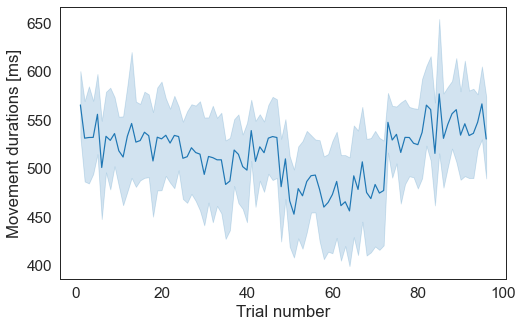

In [28]:
plt.figure(figsize = (8,5))
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

sns.lineplot(data = plotting_data,
             x = 'trial', 
             y = 'movement_durations')

plt.xlabel('Trial number')
plt.ylabel('Movement durations [ms]')
plt.show()

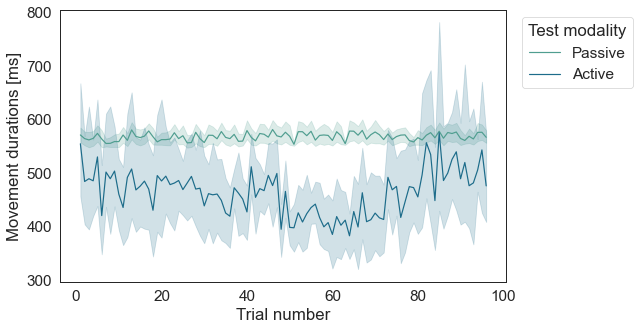

In [29]:
plt.figure(figsize = (8,5))
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

sns.lineplot(data = plotting_data,
             x = 'trial', 
             y = 'movement_durations', 
             hue = 'movement_type',
             palette = 'crest',
             )

plt.legend(bbox_to_anchor = (1.3 ,1), title = 'Test modality')
plt.xlabel('Trial number')
plt.ylabel('Movement durations [ms]')
plt.show()

## FacetGrid

https://seaborn.pydata.org/tutorial/axis_grids.html

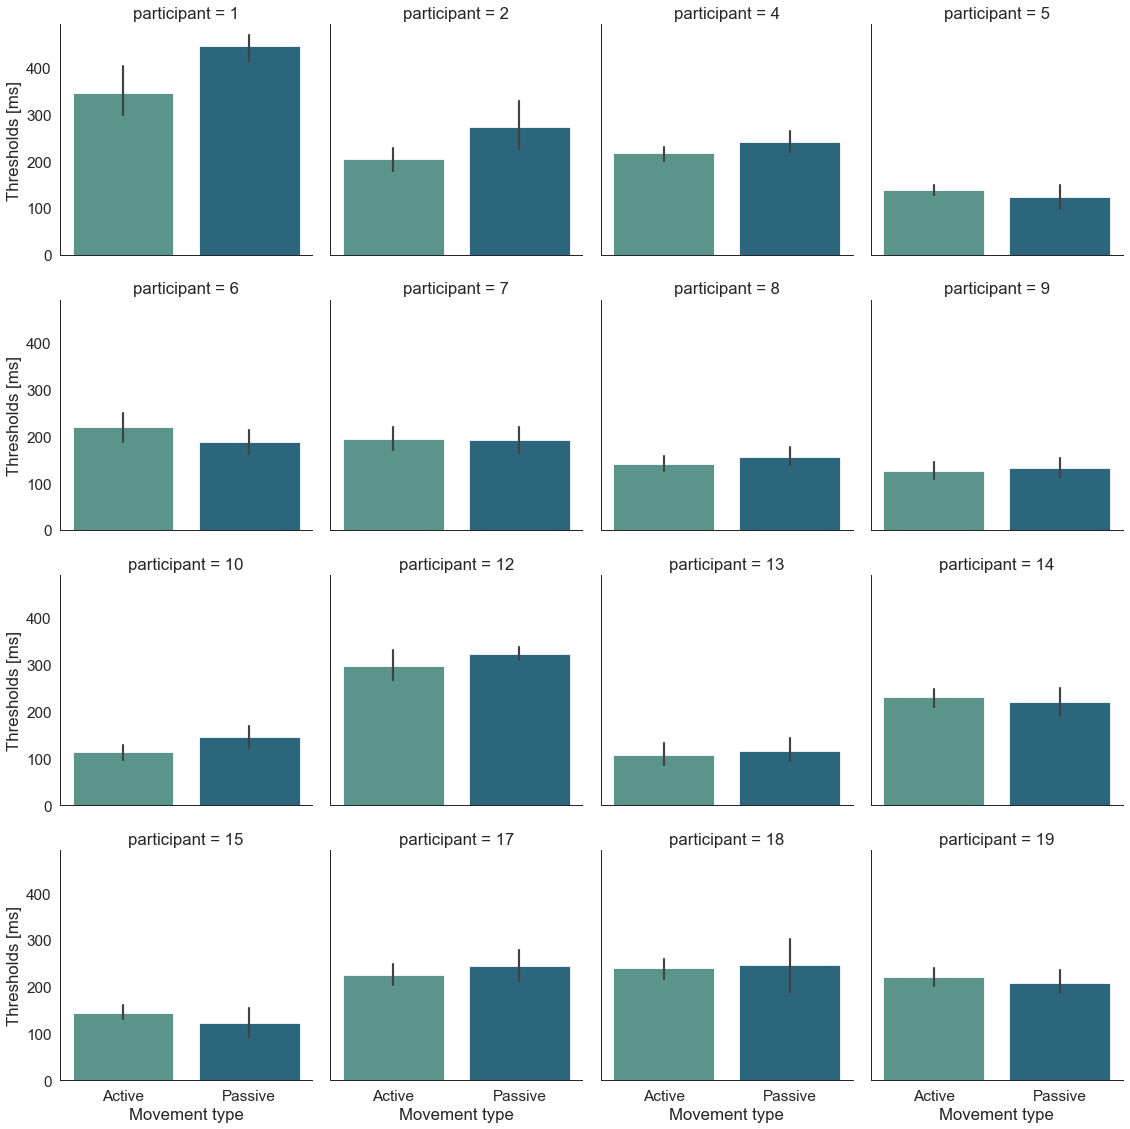

In [32]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

# Defining the grid
grid = sns.FacetGrid(data = group_stats,
                     col = 'participant',
                     col_wrap = 4,
                     height = 4,
                     # sharey = False,
                     )

# Mapping plots onto the grid
grid.map(sns.barplot, "movement_type", "thresholds", order = ['Active', 'Passive'], palette = 'crest')
grid.set(ylabel = 'Thresholds [ms]', xlabel = 'Movement type')

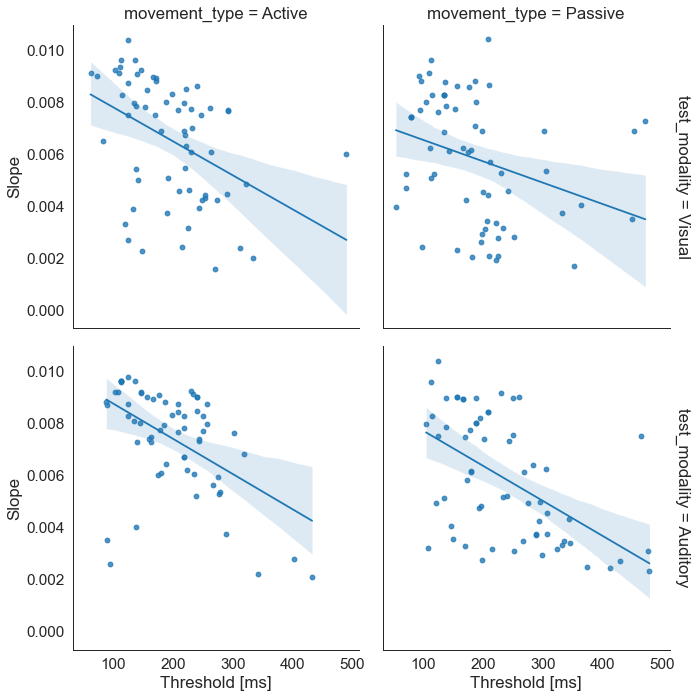

In [33]:
sns.set_style("white") 
sns.set_context("paper", font_scale = 1.75)

grid = sns.FacetGrid(data = group_stats, 
                     row = 'test_modality',  
                     col = 'movement_type', 
                     height = 5,
                     margin_titles = True,
                     )
grid.map(sns.regplot, 'thresholds', 'slopes', fit_reg = True)
grid.set(ylabel = 'Slope', xlabel = 'Threshold [ms]')

## Error bars

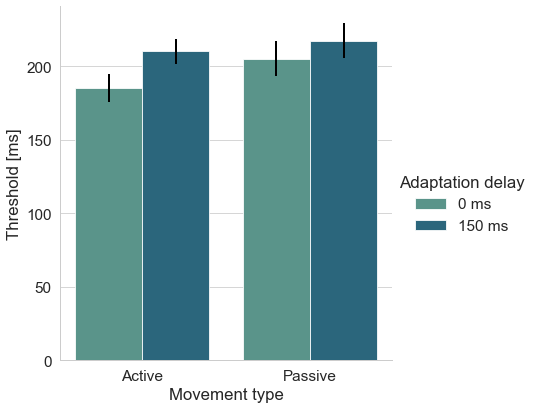

In [42]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75) 

plot = sns.catplot(data = group_stats,  
                   x = 'movement_type', 
                   y = 'thresholds',
                   hue = 'adaptation_delay',
                   kind = 'bar',        
                   height = 6,          
                   palette = 'crest',   
                   ci = 95 # default: 95; alternative: sd
                  )

plot._legend.set_title('Adaptation delay') 
plt.ylabel('Threshold [ms]')  
plt.xlabel('Movement type')

# Add sem as error bars
# func.plot_sem(plot, data = group_stats, x = 'movement_type', y = 'thresholds', hue = 'adaptation_delay')

plt.show() 

## Adding statistical annotations

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Active_0 ms v.s. Active_150 ms: Custom statistical test, P_val:1.000e-02


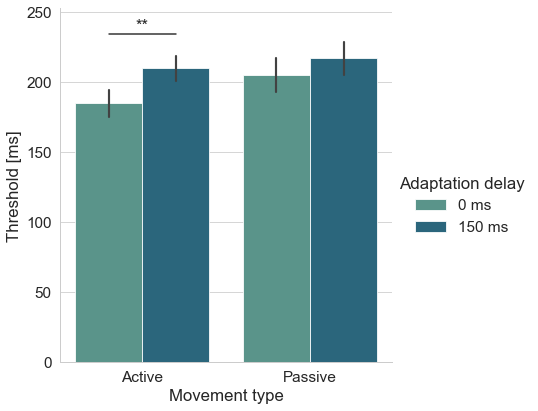

In [40]:
sns.set_style("whitegrid") 
sns.set_context("paper", font_scale = 1.75) 

plot = sns.catplot(data = group_stats,  
                   x = 'movement_type', 
                   y = 'thresholds',
                   hue = 'adaptation_delay',
                   kind = 'bar',               
                   height = 6,          
                   palette = 'crest',   
                   ci = 68 
                  )

plot._legend.set_title('Adaptation delay') 
plt.ylabel('Threshold [ms]')  
plt.xlabel('Movement type')


# Add statistical annotation
comp_pairs = [[('Active','0 ms'),('Active','150 ms')]]
pvalues    = [[0.01]] 
func.statistical_annotation(plot, 'bar', group_stats, comp_pairs, pvalues, 
                            x = 'movement_type', y = 'thresholds', hue = 'adaptation_delay')

plt.show() 